## PCA Project

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.


### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
#Load the data

data_df = pd.read_csv('vehicle.csv')

In [3]:
data_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

### First look at Data and Preprocessing

In [4]:
features = data_df.columns.tolist()[0:-1]
target = data_df.columns.tolist()[-1]

In [5]:
print("feature lists--> %s \n\n\ntarget--> %s"%(features,target))

feature lists--> ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio'] 


target--> class


In [6]:
data_df.shape
#we can see that there are 846 rows and 19 columns ( including a target column)

(846, 19)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

From the output we notice that there are missing values or NAN values for some of the features

In [8]:
#Lets check for NaN or null values

data_df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [9]:
#Lets count the NaNs
data_df.isna().sum(axis=0)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#Lets fill NaNs with median

data_df.fillna(data_df.median(),inplace=True)

In [11]:
#Lets count the NaNs
data_df.isna().sum(axis=0)
#Great, all null values are taken care now

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [13]:
data_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

From the output above we can infer 
- scatter_ratio is slighty right skewed as mean value is > median, same case with scaled_variance, scaled_variance.1
- rest all features looks to be normally distributed

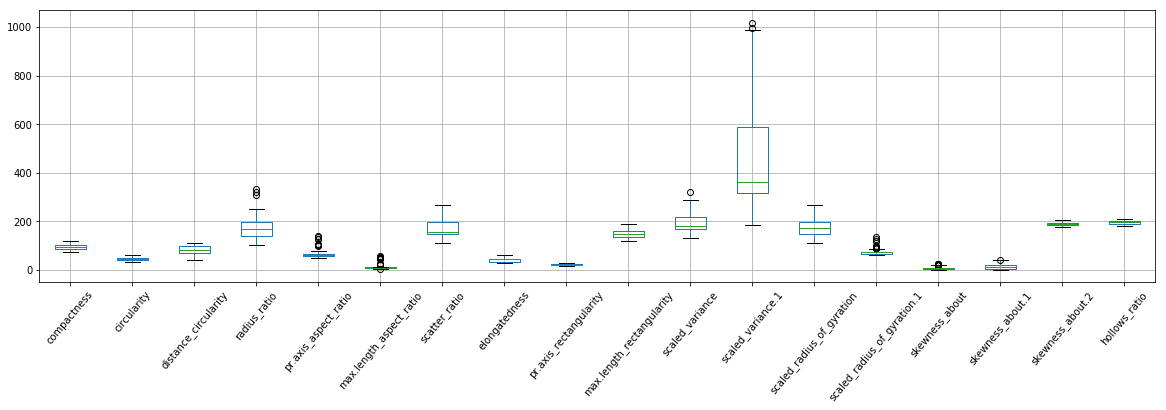

In [14]:
# Lets check outliers using boxplot
data_df.boxplot(figsize=(20,5),rot=50)

From the graph we can see that
- radius_ration , pr.axis_aspect_ratio , max.length_aspect_ration ,scaled_variance, scaled_variance.1 , scaled_radius_of_gyration features have outliers

In [15]:
# Lets take care of outliers now
# as per 5 number summary , we know that the values within 3 std from mean account for about 99.7% of the data set
# lets use this aproach to knock out data that fall below or above 3 std cutoff ( we can replace outliers with median values too)

In [16]:
# make copy of original data set

newdata = data_df.copy()

In [17]:
newdata.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car

In [18]:
# Taking care of radius_ratio outliers 
data_mean = newdata['radius_ratio'].mean()
cutoff = newdata['radius_ratio'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['radius_ratio'] > upper) | (newdata['radius_ratio'] < lower)) ]

#So these are the outliers for radius_ration which we have to remove

compactness  circularity  distance_circularity  radius_ratio  \
37            90         48.0                  86.0         306.0   
135           89         47.0                  83.0         322.0   
388           94         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                       49          153.0   
135                 133.0                       48          158.0   
388                 138.0                       49          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                        156   
135           43.0                    20.0                        163   
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio class  
37              185.0            194   van  
135             184.0            194   van  
388             188.0            196   van

In [19]:
#Remove the outliers indexes
newdata.drop(newdata[((newdata['radius_ratio'] > upper) | (newdata['radius_ratio'] < lower)) ].index,inplace=True)

In [20]:
# Taking care of pr.axis_aspect_ratio outliers 
data_mean = newdata['pr.axis_aspect_ratio'].mean()
cutoff = newdata['pr.axis_aspect_ratio'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['pr.axis_aspect_ratio'] > upper) | (newdata['pr.axis_aspect_ratio'] < lower)) ]

#So these are the outliers for pr.axis_aspect_ratio which we have to remove

compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
100           82         45.0                  66.0         252.0   
291           89         45.0                  81.0         246.0   
523           90         43.0                  81.0         231.0   
706           82         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
100                 126.0                       52          148.0   
291                 102.0                       43          155.0   
523                  97.0                       46          150.0   
706                 105.0                       55          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
100           45.0                    19.0                        144   
291           44.0                    20.0                        160   
523           45.0                    19.0                        149   
706           48.0                    18.0                        145   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
100            237.0              326.0                      185.0   
291            200.0              347.0                      177.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
100                        119.0             1.0               1.0   
291                         90.0             9.0              17.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio class  
4               180.0            183   bus  
100             181.0            185   bus  
291             183.0            192   van  
523             186.0            196   van  
706             190.0            199   van

In [21]:
#Remove the outliers indexes
newdata.drop(newdata[((newdata['pr.axis_aspect_ratio'] > upper) | (newdata['pr.axis_aspect_ratio'] < lower)) ].index,inplace=True)

In [22]:
# Taking care of max.length_aspect_ratio outliers 
data_mean = newdata['max.length_aspect_ratio'].mean()
cutoff = newdata['max.length_aspect_ratio'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['max.length_aspect_ratio'] > upper) | (newdata['max.length_aspect_ratio'] < lower)) ]

#So these are the outliers for pr.axis_aspect_ratio which we have to remove

compactness  circularity  distance_circularity  radius_ratio  \
127           85         41.0                  66.0         155.0   
391           91         38.0                  70.0         160.0   
544           88         43.0                  70.0         177.0   
815           81         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
127                  65.0                       22          149.0   
391                  66.0                       25          140.0   
544                  74.0                       19          152.0   
815                  69.0                       22          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
127           45.0                    19.0                        139   
391           47.0                    18.0                        139   
544           44.0                    19.0                        143   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
127            173.0              330.0                      155.0   
391            162.0              296.0                      130.0   
544            180.0              342.0                      168.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
127                         75.0             6.0              16.0   
391                         67.0             4.0              11.0   
544                         76.0             1.0               9.0   
815                         88.0             1.0              10.0   

     skewness_about.2  hollows_ratio class  
127             184.0            191   bus  
391             192.0            202   van  
544             186.0            189   bus  
815             180.0            185   bus

In [23]:
#Remove the outliers indexes
newdata.drop(newdata[((newdata['max.length_aspect_ratio'] > upper) | (newdata['max.length_aspect_ratio'] < lower)) ].index,inplace=True)

In [24]:
# Taking care of scaled_variance outliers 
data_mean = newdata['scaled_variance'].mean()
cutoff = newdata['scaled_variance'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['scaled_variance'] > upper) | (newdata['scaled_variance'] < lower)) ]

#So these are the outliers for scaled_variance which we have to remove

compactness  circularity  distance_circularity  radius_ratio  \
321          113         57.0                 109.0         194.0   
396          108         44.0                 106.0         177.0   
687          106         57.0                 107.0         235.0   
733          114         57.0                 102.0         181.0   
835          111         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
321                  56.0                        6          260.0   
396                  51.0                        5          256.0   
687                  67.0                        6          262.0   
733                  52.0                        6          257.0   
835                  51.0                        6          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
321           26.0                    28.0                        175   
396           26.0                    28.0                        170   
687           26.0                    28.0                        171   
733           26.0                    28.0                        169   
835           26.0                    29.0                        174   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
321            288.0              982.0                      261.0   
396            285.0              966.0                      261.0   
687            285.0              987.0                      260.0   
733            287.0              968.0                      261.0   
835            285.0             1018.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
321                         85.0            11.0              21.0   
396                         87.0            11.0               2.0   
687                         86.0             9.0              31.0   
733                         85.0             2.0              21.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio class  
321             182.0            183   bus  
396             182.0            181   bus  
687             180.0            184   bus  
733             182.0            184   bus  
835             181.0            183   bus

In [25]:
#Remove the outliers indexes
newdata.drop(newdata[((newdata['scaled_variance'] > upper) | (newdata['scaled_variance'] < lower)) ].index,inplace=True)

In [26]:
# Taking care of scaled_variance.1 outliers 
data_mean = newdata['scaled_variance.1'].mean()
cutoff = newdata['scaled_variance.1'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['scaled_variance.1'] > upper) | (newdata['scaled_variance.1'] < lower)) ]

#So these are the outliers for scaled_variance.1 which we have to remove

compactness  circularity  distance_circularity  radius_ratio  \
5           107         44.0                 106.0         172.0   
54          101         56.0                 104.0         185.0   
85          110         58.0                 106.0         180.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
54                  53.0                        6          257.0   
85                  51.0                        6          261.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
54           26.0                    28.0                        168   
85           26.0                    28.0                        171   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
54            275.0              956.0                      230.0   
85            278.0              998.0                      257.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
54                         83.0             5.0              26.0   
85                         83.0             9.0              13.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
54             180.0            184   bus  
85             181.0            182   bus

In [27]:
#Remove the outliers indexes
newdata.drop(newdata[((newdata['scaled_variance.1'] > upper) | (newdata['scaled_variance.1'] < lower)) ].index,inplace=True)

In [28]:
# Taking care of scaled_radius_of_gyration outliers 
data_mean = newdata['scaled_radius_of_gyration'].mean()
cutoff = newdata['scaled_radius_of_gyration'].std()*3
lower ,upper = data_mean - cutoff , data_mean + cutoff
lower,upper

newdata[((newdata['scaled_radius_of_gyration'] > upper) | (newdata['scaled_radius_of_gyration'] < lower)) ]

#So these are the outliers for scaled_radius_of_gyration which we have to remove, nothing to remove

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [29]:
#We can also use impute method to replace outliers with median, below method can be used for the same
def outlierTreatment(feature):
    # Taking care of outliers 
    data_mean = newdata[feature].mean()
    cutoff = newdata[feature].std()*3
    lower ,upper = data_mean - cutoff , data_mean + cutoff
    lower,upper

    newdata[((newdata[feature] > upper) | (newdata[feature] < lower)) ]

    #So these are the outliers which we have to remove
    #Remove the outliers indexes
    #newdata.drop(newdata[((newdata[feature] > upper) | (newdata[feature] < lower)) ].index,inplace=True)
    
    #update outliers with median
    newdata.loc[((newdata[feature] > upper) | (newdata[feature] < lower)),feature ] = newdata[feature].median()

##### All the outliers are now taken care, lets plot box plot again to see

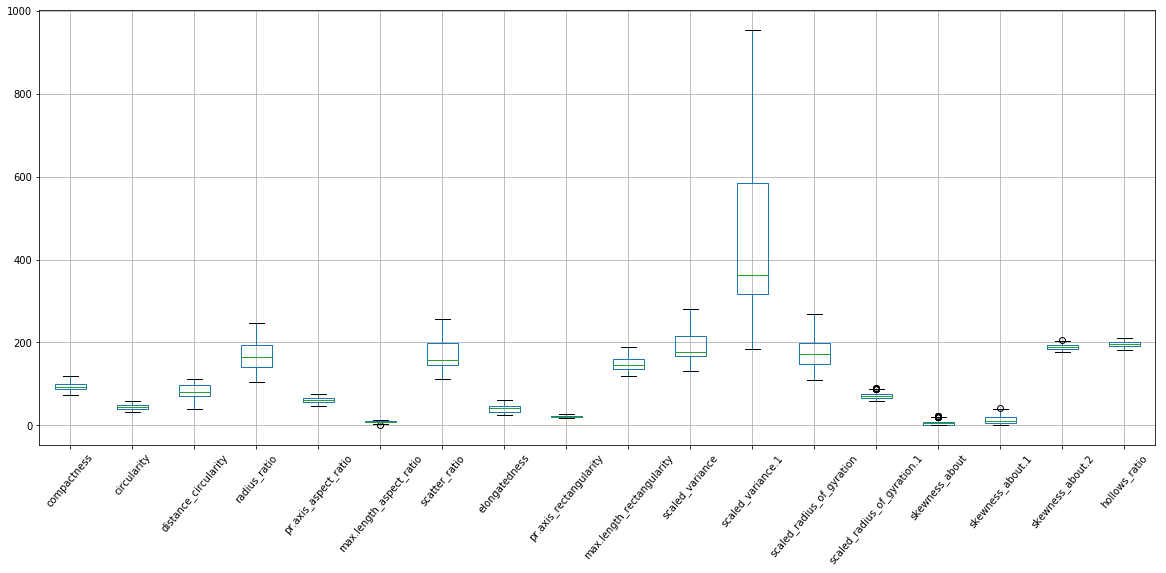

In [30]:
newdata.boxplot(figsize=(20,8),rot=50)

### Understanding the attributes, univariate and multivariate analysis

##### Lets plot histogram to understand the distribution of dataset

[]

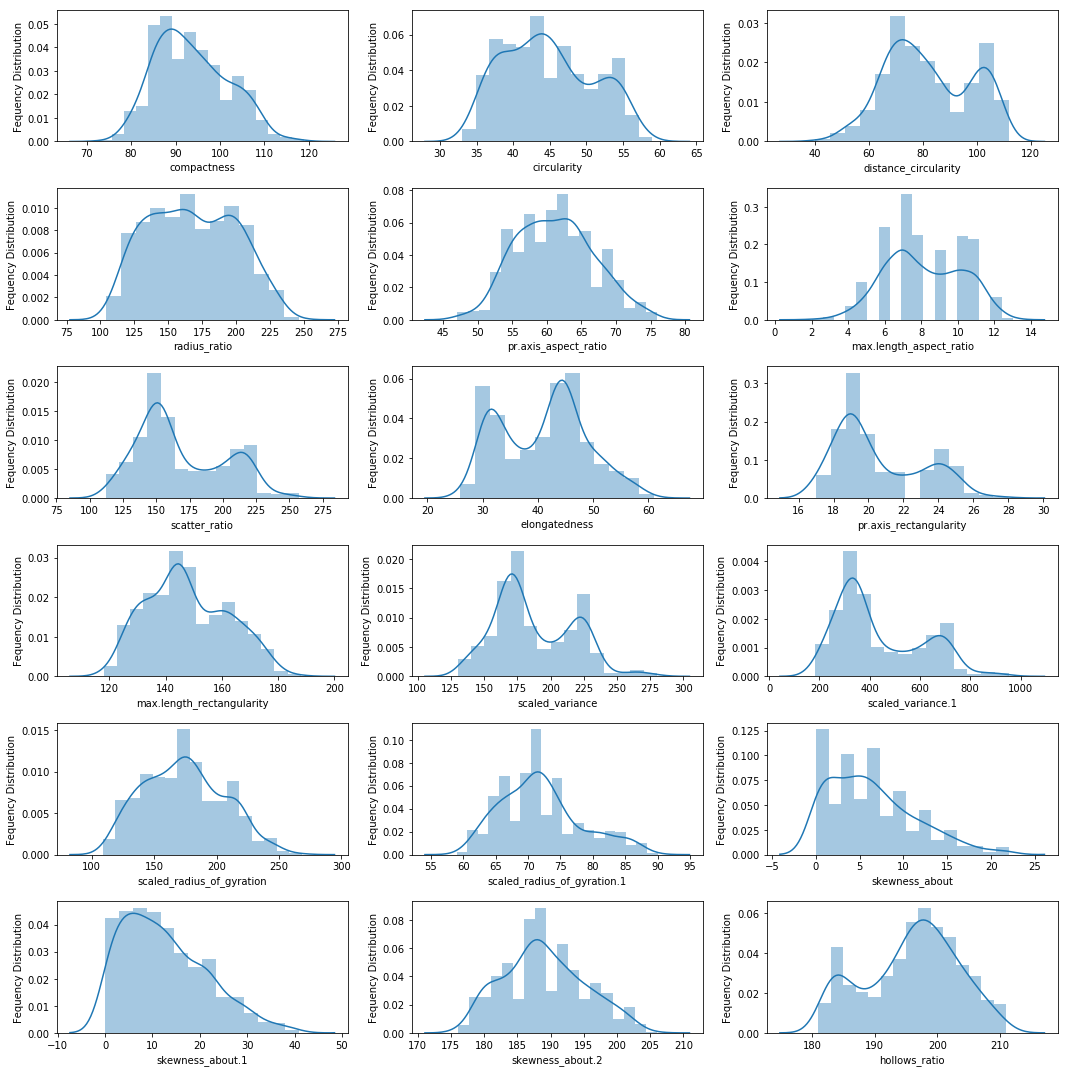

In [31]:
count = 1
plt.figure(figsize=(15,15))
for feature in features:
    plt.subplot(6,3,count)
    plt.tight_layout()
    plt.ylabel('Fequency Distribution')
    sns.distplot(newdata[feature])
    count = count +1

plt.plot()

From the graph above
- we can see that compactness and scaled_radius_of_gyration looks normally distirbuted
- some of the feature are skewed slighly like pr.axis_aspect_ratio, skewness_about.1
- we also see that many features have multiple density curves(binomial distribution) , circularity,distance_circularity,scatter_ratio,scaked+variance etc
- we also see random distribution  in some case like hollows_ratio

##### Lets now plot pairplot to understand if features are correlated

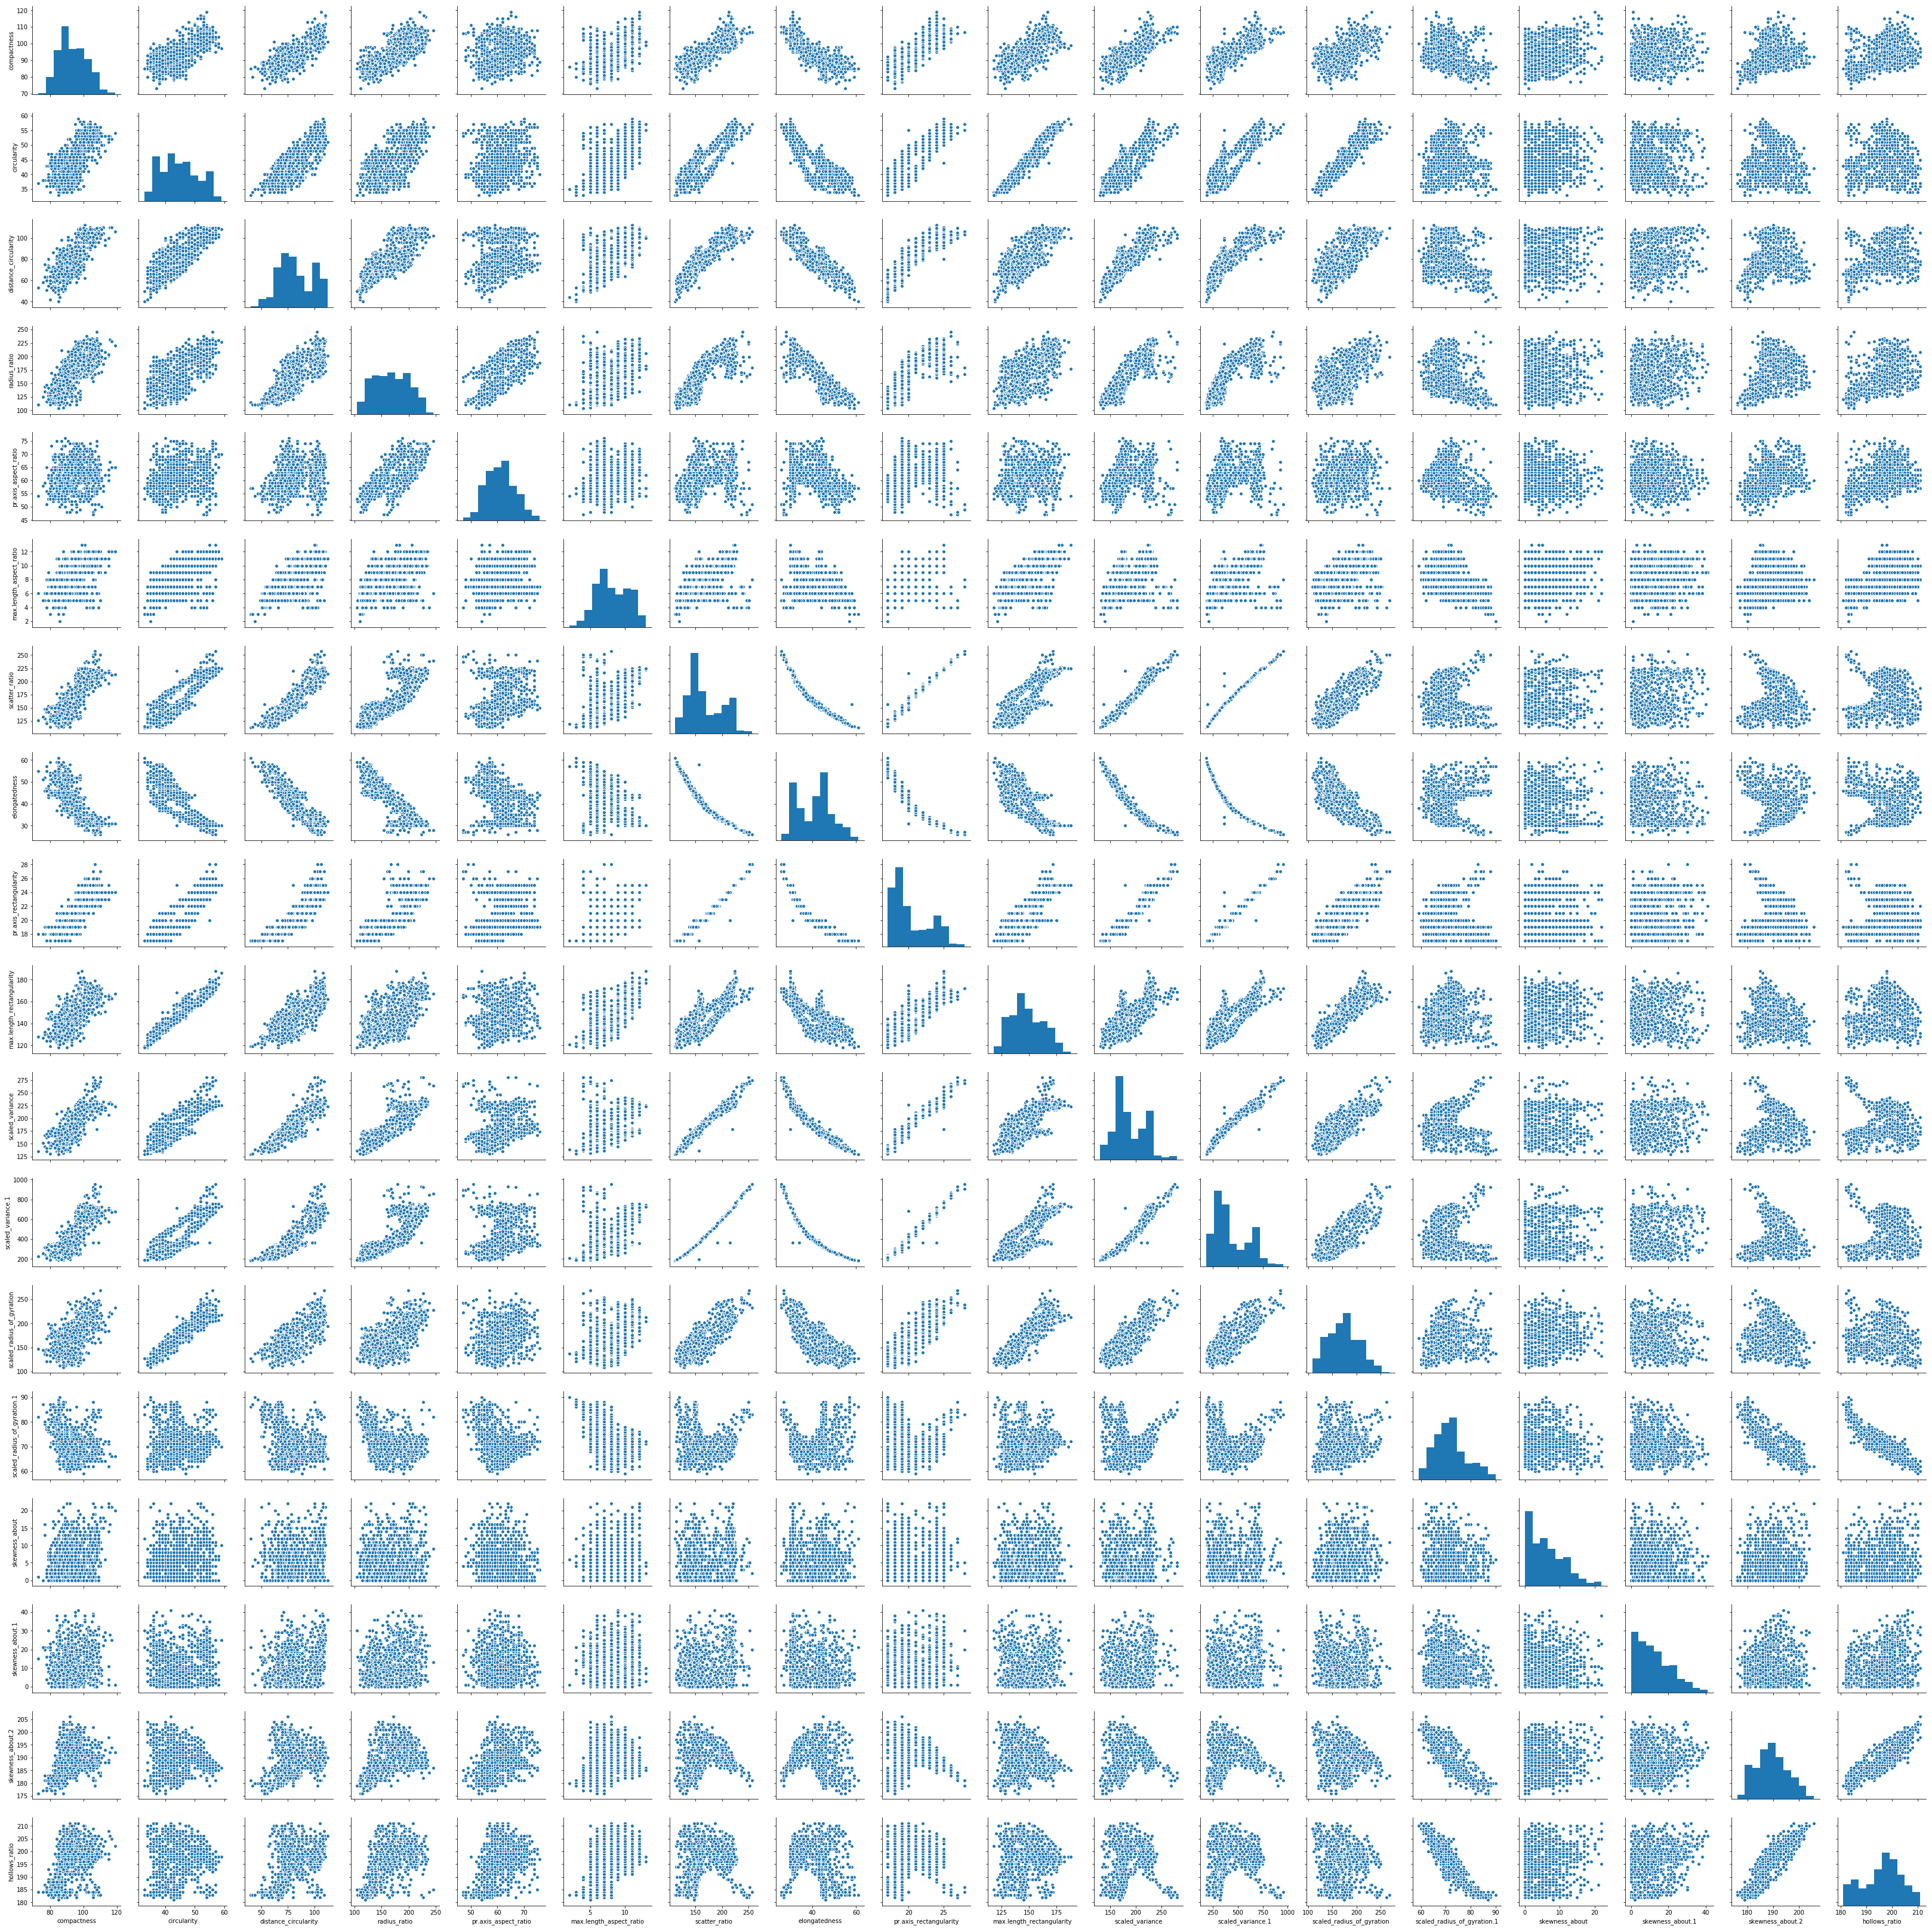

In [32]:
sns.pairplot(newdata[features])

#### From the above pair plot we can see that
- there is positive correlation between compactness and circularity
- There are many features which are correlated , either have postive or negative correlation
- There are few features like hollows_ratio,skewness_about.1 etc have no correlation as we see cloud like scatter plot distributions

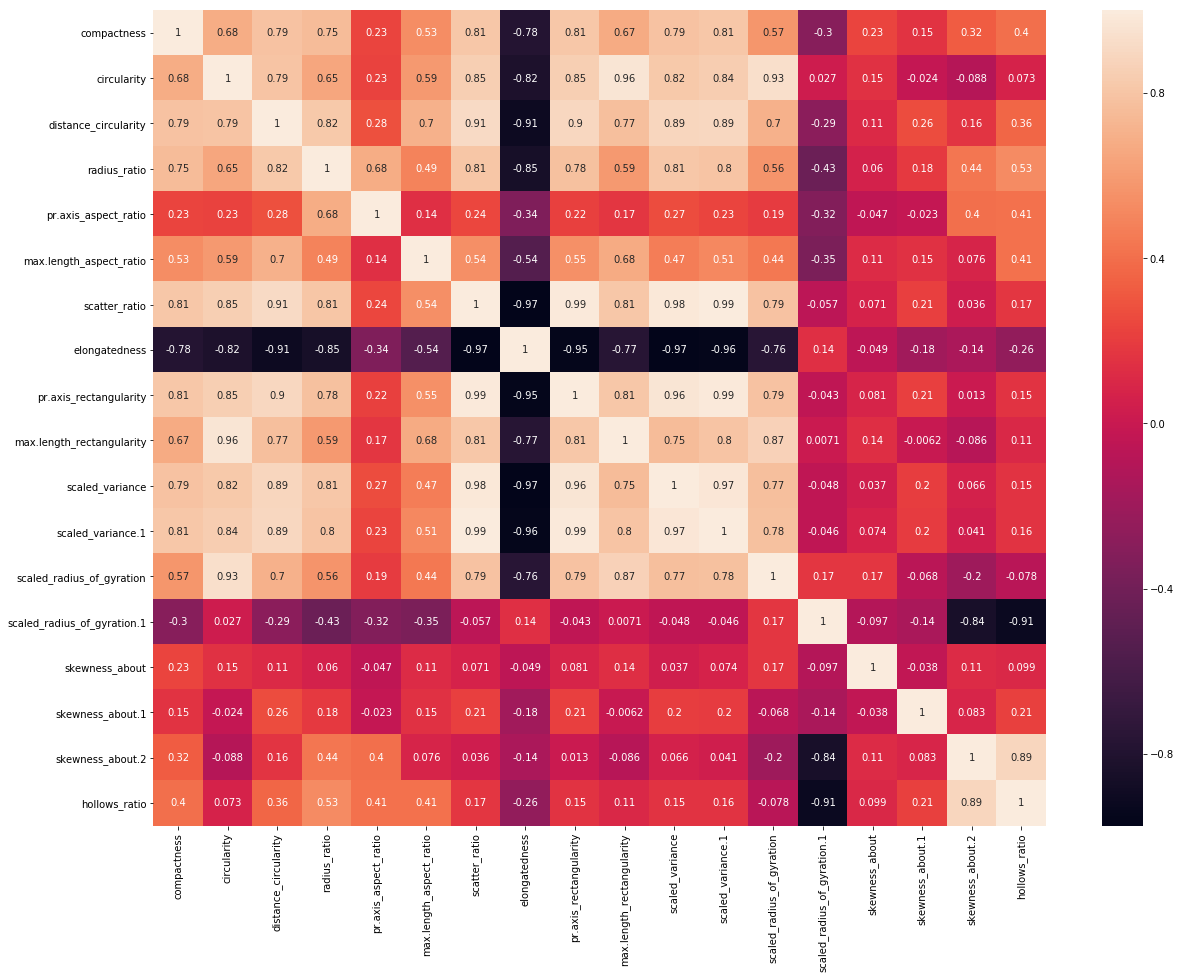

In [33]:
#Lets check with heat map

plt.figure(figsize=(20,15))
sns.heatmap(newdata[features].corr(),annot=True)

In [34]:
#Lets check correlation values, value close to 0 no correlation value close to (+/-) 1 has correlation

newdata[features].corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.683204              0.785225   
circularity                     0.683204     1.000000              0.792431   
distance_circularity            0.785225     0.792431              1.000000   
radius_ratio                    0.753996     0.650575              0.817123   
pr.axis_aspect_ratio            0.230851     0.228575              0.275954   
max.length_aspect_ratio         0.534053     0.590056              0.700358   
scatter_ratio                   0.807581     0.853415              0.909073   
elongatedness                  -0.782552    -0.822047             -0.910365   
pr.axis_rectangularity          0.809838     0.851202              0.898809   
max.length_rectangularity       0.672231     0.964983              0.770722   
scaled_variance                 0.786796     0.815437              0.890613   
scaled_variance.1               0.810760     0.844648              0.893107   
scaled_radius_of_gyration       0.572973     0.933670              0.701227   
scaled_radius_of_gyration.1    -0.298335     0.027477             -0.286269   
skewness_about                  0.234637     0.146547              0.110147   
skewness_about.1                0.152367    -0.024008              0.262767   
skewness_about.2                0.322652    -0.088293              0.163586   
hollows_ratio                   0.404337     0.072906              0.364024   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.753996              0.230851   
circularity                      0.650575              0.228575   
distance_circularity             0.817123              0.275954   
radius_ratio                     1.000000              0.678112   
pr.axis_aspect_ratio             0.678112              1.000000   
max.length_aspect_ratio          0.486402              0.143896   
scatter_ratio                    0.805741              0.244321   
elongatedness                   -0.852579             -0.336996   
pr.axis_rectangularity           0.782112              0.216408   
max.length_rectangularity        0.587614              0.174480   
scaled_variance                  0.814134              0.266216   
scaled_variance.1                0.795983              0.234791   
scaled_radius_of_gyration        0.562955              0.190662   
scaled_radius_of_gyration.1     -0.431037             -0.318982   
skewness_about                   0.060112             -0.047302   
skewness_about.1                 0.183936             -0.023287   
skewness_about.2                 0.436110              0.401574   
hollows_ratio                    0.527872              0.413669   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.534053       0.807581   
circularity                                 0.590056       0.853415   
distance_circularity                        0.700358       0.909073   
radius_ratio                                0.486402       0.805741   
pr.axis_aspect_ratio                        0.143896       0.244321   
max.length_aspect_ratio                     1.000000       0.544745   
scatter_ratio                               0.544745       1.000000   
elongatedness                              -0.541499      -0.973454   
pr.axis_rectangularity                      0.546916       0.989203   
max.length_rectangularity                   0.675353       0.809690   
scaled_variance                             0.465651       0.977372   
scaled_variance.1                           0.509264       0.993052   
scaled_radius_of_gyration                   0.442216       0.789623   
scaled_radius_of_gyration.1                -0.350317      -0.056675   
skewness_about                              0.113574       0.070960   
skewness_about.1                            0.151527       0.209102   
skewness_about.2                            0.

### some of the facts we know
- we know that, model will perform well if all the features are independent or have no correlation, however with current dataset this is not the case as we have many features which are correlated
- PCA ( Principal Component Analysis) is one approach or technique that is used to increase the signle to noise ration and for dimension reduction, this technique can be used to get the information content that is available in mathematical space but never fed to the model ( infact this technique works well on features having correlation by extracting the information that is no where fed to model or used to build the model)

### Let us now use the PCA to select the features (though it selects the features internally) to build the Principal components which are then used to build the model, below are the steps that needs to be done
- Standardize the data
- Generate the covariance matrix  , value close to 0 no correlation value close to (+/-) 1 has correlation
- Perform eigen decomposition, compute eigen vectors which are the principal components and the corresponding eigen values which are the magnitudes of variance captured
- Sort the eigen pairs in decending order and select the largest one
- Eigne vectors with insignificant contribution to total eigen values can be removed from analysis

### Standardize the Data , use zscore

In [35]:
from scipy.stats import zscore

data_std = newdata[features].apply(lambda a:zscore(a))

In [36]:
data_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.168769     0.532879              0.064930      0.320805   
1    -0.322952    -0.613792              0.128626     -0.838386   
2     1.275140     0.860499              1.529938      1.292018   
3    -0.077092    -0.613792              0.001234     -0.274455   
6     0.414629    -0.286172             -0.572030      0.164157   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.937155                 0.894124      -0.194794   
1             -0.751168                 0.414860      -0.597432   
2              0.861826                 0.894124       1.198951   
3              0.324161                 0.414860      -0.752292   
6              0.682604                -1.022934      -0.473543   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.125961               -0.211958                   0.776009   
1       0.513223               -0.611678                  -0.329373   
2      -1.164909                0.987201                   0.706923   
3       0.642310               -0.611678                  -0.329373   
6       0.125961               -0.611678                  -0.329373   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.379544          -0.333454                   0.316397   
1        -0.582175          -0.621909                  -0.500400   
2         1.207730           1.173576                   1.447346   
3        -0.919893          -0.745533                  -1.474273   
6        -0.379544          -0.439417                  -0.060587   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.310941       -0.078232          0.380637   
1                     0.008906        0.531386          0.157496   
2                     0.168830        1.547415         -0.400357   
3                    -1.430407       -0.078232         -0.288787   
6                    -0.950636        1.344209         -1.292922   

   skewness_about.2  hollows_ratio  
0         -0.334271       0.162021  
1         -0.008480       0.433204  
2         -0.171376       0.026429  
3          1.620475       1.517938  
6          1.783371       1.111163

### Lets genereate covariance matrix/Correlation matrix

In [37]:
#Lets check correlation values, value close to 0 no correlation value close to (+/-) 1 has correlation

#data_std.corr()

#we can use below as well
cov_matrix = np.cov(data_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00121212  0.68403226  0.78617699  0.75490965  0.23113071  0.53470003
   0.80856016 -0.78350089  0.81081968  0.67304594  0.78774955  0.8117427
   0.57366774 -0.29869616  0.23492157  0.15255211  0.32304295  0.40482742]
 [ 0.68403226  1.00121212  0.7933919   0.65136355  0.22885166  0.59077171
   0.85444957 -0.823043    0.85223371  0.96615261  0.81642547  0.84567153
   0.93480122  0.02751049  0.14672434 -0.02403687 -0.08840048  0.07299477]
 [ 0.78617699  0.7933919   1.00121212  0.81811295  0.27628831  0.70120657
   0.91017471 -0.91146865  0.89989856  0.77165641  0.89169301  0.89418909
   0.70207739 -0.2866158   0.11028027  0.26308561  0.16378448  0.3644655 ]
 [ 0.75490965  0.65136355  0.81811295  1.00121212  0.67893429  0.48699162
   0.80671734 -0.85361268  0.78305959  0.58832612  0.8151213   0.79694756
   0.56363719 -0.43155902  0.06018481  0.18415924  0.43663896  0.52851217]
 [ 0.23113071  0.22885166  0.27628831  0.67893429  1.00121212  0.14407032
   0.24461696

### Perform Eigen decomposition

In [38]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s' %(eigenvectors))
print('\n Eigen Values \n%s' %(eigenvalues))

Eigen Vectors 
[[-0.2701049  -0.08571276  0.07053439  0.12392608  0.14602325  0.26516681
  -0.22987241 -0.75963902 -0.3594261   0.1259812   0.03431761  0.00910923
  -0.01017777 -0.14833182  0.0958449  -0.00930276  0.01165369 -0.00115727]
 [-0.2830255   0.153789    0.19223991 -0.05351308 -0.13265925 -0.07384143
   0.37300168 -0.08194273 -0.03527631 -0.20206431  0.07495763  0.08425304
  -0.01284812 -0.08963769 -0.1975594   0.15387513  0.74691705  0.06281565]
 [-0.29980713 -0.03417535 -0.06113606  0.1158651  -0.08060404 -0.02194264
  -0.15665352  0.2988607  -0.24547748  0.12536409  0.77600705 -0.25606661
   0.01126473  0.11395153  0.02879563 -0.02284375  0.0208562  -0.11098924]
 [-0.27555265 -0.18697549 -0.08517772 -0.23804564  0.1386275  -0.11691752
  -0.15072587  0.05894651 -0.16699141 -0.06586684 -0.1142082   0.19326616
  -0.0401121   0.05802583 -0.77229385 -0.03867892 -0.17342183 -0.22473274]
 [-0.11170664 -0.23952768 -0.01532037 -0.61800028  0.13267516 -0.58946222
  -0.11908543 -0.15

- At this point eigen vectors/Principal components are formed ( eigen vectors are nothing but Principal Components)
- number of eigen vectors generated will be equal to the number of indepdnent features
- every eigen vector is associated with eigen values

### Lets sort eigen vectors / PCAs 

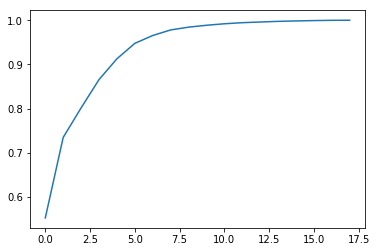

In [39]:
#Lets plot cumulative explained variance

from sklearn.decomposition import PCA

pca = PCA().fit(data_std)  # this actually generates eigen vectors(Principal components) and eigen values

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [40]:
#Lets print the same
np.cumsum(pca.explained_variance_ratio_)

array([0.5525002 , 0.73476783, 0.80159249, 0.86561334, 0.91271613,
       0.94764806, 0.96545664, 0.97802943, 0.98434831, 0.9886085 ,
       0.99200766, 0.99446518, 0.99599582, 0.99746929, 0.99843767,
       0.99923941, 0.99982334, 1.        ])

- from the output above we can read as PC1 will capture around 55% of information from original mathematical space
- like wise PC1 and PC2 together capture around 73% of information
- PC1 to PC12 all together capture around 99.4 % of the information
- So lets use 12 PCs , that is reducing to 12 dimension ( originally we had 18 dimensions)

#### Eigne vectors with insignificant contribution to total eigen values can be removed from analysis

In [41]:
#Lets use 12 dimensions to build PCs , as these capture around 99.4 % of the information as we saw previously

pca = PCA(n_components=12)
pca.fit(data_std)

data_std_pca = pca.transform(data_std)

In [42]:
data_std_pca = pd.DataFrame(data_std_pca)
data_std_pca.head()

# so below is the transformed data using 12 principal components

0         1         2         3         4         5         6   \
0 -0.658146 -0.541717  0.298611  0.787924 -0.717515 -1.925853 -0.087211   
1  1.486264 -0.375579  0.417451 -1.182561 -0.355445 -0.111692  0.189813   
2 -4.015657  0.418612  1.117952  0.092252  0.912820 -0.540493  0.762037   
3  1.418062 -3.048991  0.482461 -0.202776 -0.778954  0.277512  0.155181   
4  0.702965 -2.255479  1.868216  0.801203  1.227712  0.683142 -0.431740   

         7         8         9         10        11  
0 -0.691204  0.290412  0.214395 -0.081160 -0.073095  
1  0.135882 -0.166917 -0.363175 -0.371747  0.281513  
2  0.230943  0.312747 -0.490897 -0.150517  0.118940  
3 -0.188810 -0.364961  0.274509 -0.465684  0.158952  
4 -0.127100 -0.104740 -0.163179 -0.015641 -0.010168

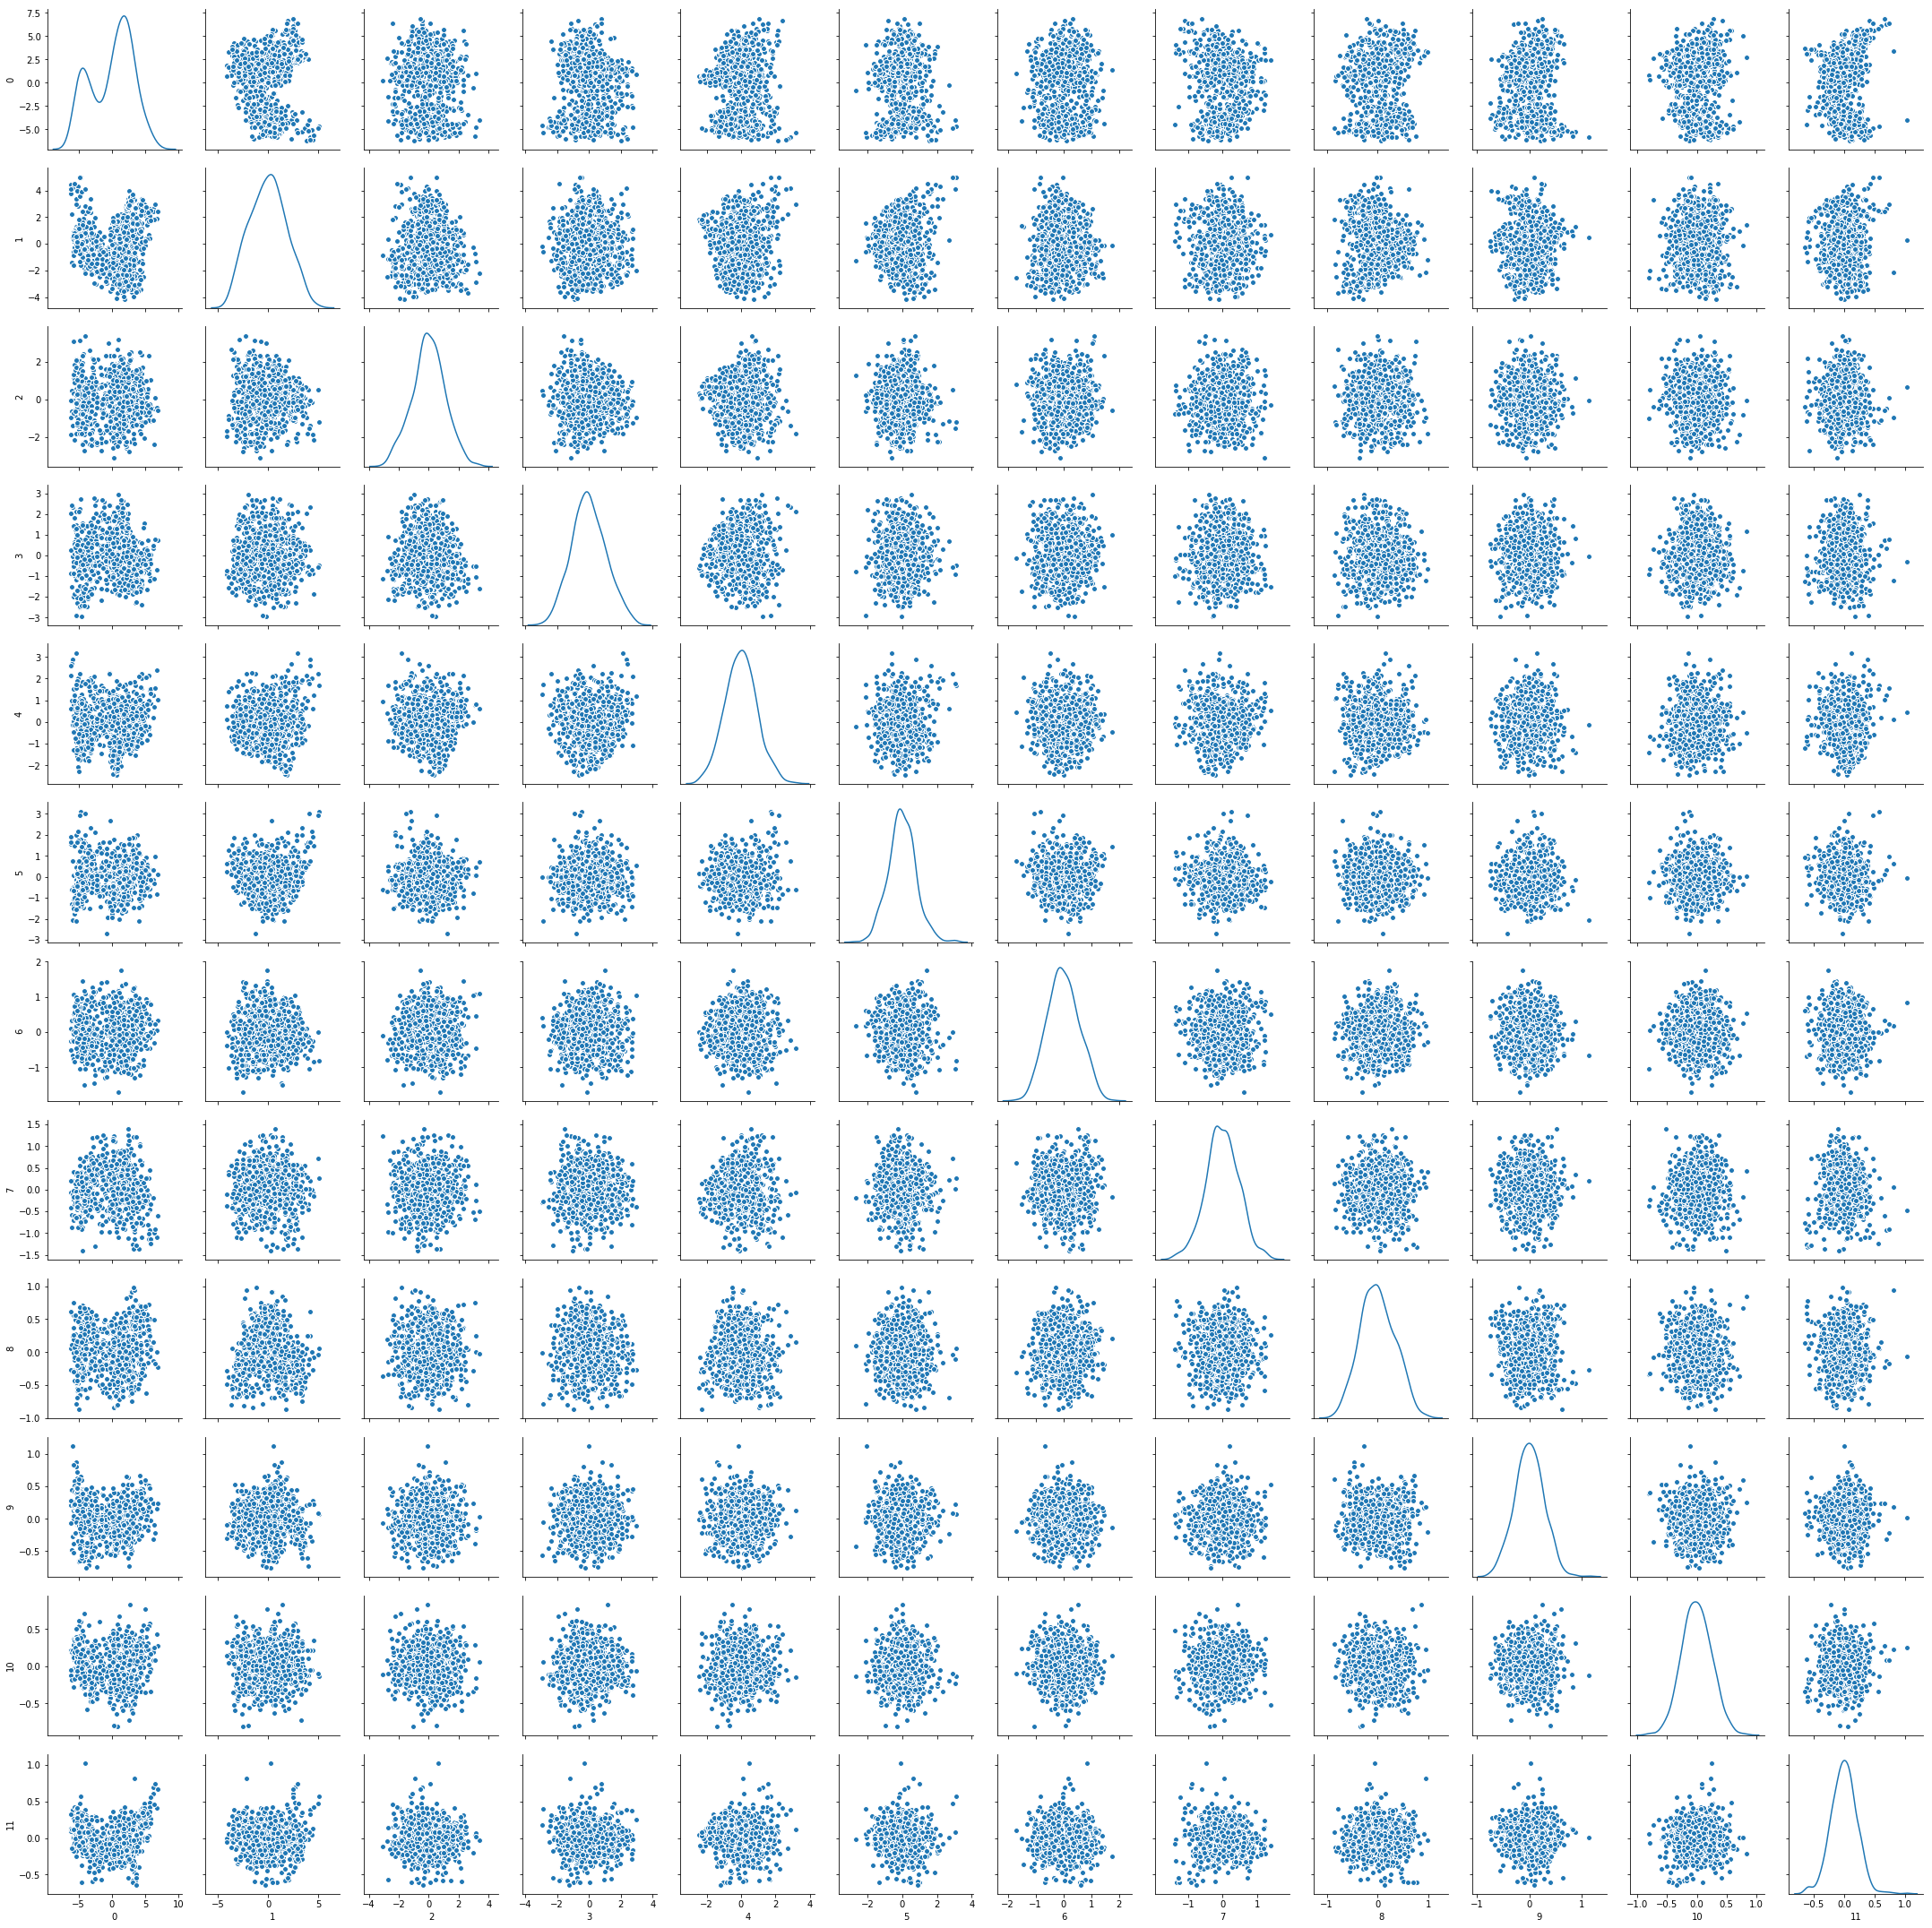

In [43]:
# Lets pair plot to see the output now

sns.pairplot(data_std_pca,diag_kind='kde')

- from the output , we can see that all the data looks like clould, which means between PCs there is no relation ship
- so PCA has done good work here , it has removed all the covariance or very close to zero

### Lets now use these Principal Components to build the model

##### Train Test split of PCA transformed data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(data_std_pca, newdata[target],test_size=0.3,random_state=28)

In [46]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(578, 12) (248, 12)
(578,) (248,)


In [47]:
def evaluateModel(model,name):
    print("######Evaluate the model %s ###########"%(name))
    print("Training Accuracy score : \t %s "%(model.score(x_train,y_train)))
    print("Test Accuracy score : \t %s "%(model.score(x_test,y_test)))
    print("Confusion matrix \n\t %s"%(metrics.confusion_matrix(y_test,y_pred)))
    print("classicification report \n %s"%(metrics.classification_report(y_test,y_pred)))

#### Lets use Naive Bayes algorithm to build the model on PCA transformed data

In [48]:
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
y_pred = model_nb.predict(x_test)
model_nb.score(x_test,y_test)

0.875

In [49]:
#Lets evaluate the model
evaluateModel(model_nb, "Naive Bayes")

######Evaluate the model Naive Bayes ###########
Training Accuracy score : 	 0.8944636678200693 
Test Accuracy score : 	 0.875 
Confusion matrix 
	 [[ 52   7   6]
 [  5 122   2]
 [  2   9  43]]
classicification report 
               precision    recall  f1-score   support

         bus       0.88      0.80      0.84        65
         car       0.88      0.95      0.91       129
         van       0.84      0.80      0.82        54

    accuracy                           0.88       248
   macro avg       0.87      0.85      0.86       248
weighted avg       0.87      0.88      0.87       248



### we can see that train accuracy is 89% and test accuracy is 87% [ PCA Transformed Data ]

#### Lets use Naive Bayes algorithm to build the model on Original data (standardized but not PCA transformed)

##### Train Test split of original data (standardized) data_std

In [55]:
x_train,x_test,y_train,y_test = train_test_split(data_std, newdata[target],test_size=0.3,random_state=28)

In [56]:
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
y_pred = model_nb.predict(x_test)
model_nb.score(x_test,y_test)

0.6209677419354839

In [57]:
#Lets evaluate the model
evaluateModel(model_nb, "Naive Bayes")

######Evaluate the model Naive Bayes ###########
Training Accuracy score : 	 0.6401384083044983 
Test Accuracy score : 	 0.6209677419354839 
Confusion matrix 
	 [[20  8 37]
 [ 5 84 40]
 [ 0  4 50]]
classicification report 
               precision    recall  f1-score   support

         bus       0.80      0.31      0.44        65
         car       0.88      0.65      0.75       129
         van       0.39      0.93      0.55        54

    accuracy                           0.62       248
   macro avg       0.69      0.63      0.58       248
weighted avg       0.75      0.62      0.63       248



### we can see that train accuracy is 64% and test accuracy is 62% [ Non PCA Transformed data]

#### Lets use Support Vector Classifier algorithm to build the model on PCA transformed data

##### Train Test split of PCA transformed data

In [58]:
x_train,x_test,y_train,y_test = train_test_split(data_std_pca, newdata[target],test_size=0.3,random_state=28)

In [59]:
model_svm = SVC(kernel='rbf')
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
model_svm.score(x_test,y_test)

C:\Users\aganiger.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9556451612903226

In [51]:
#Lets evaluate the model

evaluateModel(model_svm, "Support vectore classifier")

######Evaluate the model Support vectore classifier ###########
Training Accuracy score : 	 0.9809688581314879 
Test Accuracy score : 	 0.9556451612903226 
Confusion matrix 
	 [[ 62   1   2]
 [  1 125   3]
 [  1   3  50]]
classicification report 
               precision    recall  f1-score   support

         bus       0.97      0.95      0.96        65
         car       0.97      0.97      0.97       129
         van       0.91      0.93      0.92        54

    accuracy                           0.96       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.96      0.96      0.96       248



### we can see that train accuracy is 98% and test accuracy is 95% [ PCA Transformed data ]

#### Lets use Support Vector Classifier algorithm to build the model on original data standardized but not PCA transformed

##### Train Test split of original data (standardized) data_std

In [60]:
x_train,x_test,y_train,y_test = train_test_split(data_std, newdata[target],test_size=0.3,random_state=28)

In [61]:
model_svm = SVC(kernel='rbf')
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
model_svm.score(x_test,y_test)

C:\Users\aganiger.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9596774193548387

In [62]:
#Lets evaluate the model

evaluateModel(model_svm, "Support vectore classifier")

######Evaluate the model Support vectore classifier ###########
Training Accuracy score : 	 0.9792387543252595 
Test Accuracy score : 	 0.9596774193548387 
Confusion matrix 
	 [[ 62   1   2]
 [  1 126   2]
 [  1   3  50]]
classicification report 
               precision    recall  f1-score   support

         bus       0.97      0.95      0.96        65
         car       0.97      0.98      0.97       129
         van       0.93      0.93      0.93        54

    accuracy                           0.96       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.96      0.96      0.96       248



### we can see that train accuracy is 97% and test accuracy is 95% [ Non PCA Transformed data ]

#

## Summary

- Data Preprocessing 
> - As part of data preprocessing we took a glance over number of independent features and number of overall records(rows) available as part of the dataset
> - we found out that some of the independent features had missing values, so in order to fix these we replaced all of the missing values with median of that corresponding feature
> - we also checked the statistical information of features by using describe() method and noticed that only few features like scatter_ratio, scaled_variance were  skewed in nature and rest features looked as normally distributed
> - we then checked for outliers using boxplot, we found out that some of the features had outliers and we used 5 number summary to identify the data set that needs to be considered as outliers and then removed them from the original data set ( we can also replace these data sets with median value of the feature)
- UnderStanding the attributes/features
> - we draw histogram plot of each features to understand the distributions of data, found out that distribution was mixed in nature, few feature sets were normally distributed, some were binomial and random distribution in nature (having two and more kde density curve)
> - then we used pair plot to understand the relationship between independent variables, found out many features were correlated either positively or negatively
> - To cross check we used heatmap to see the correlation
- Principal component analysis
> - Ideally features which have correlation are considered in PCA, however in this usecase we have used entire set of indepenent features ( though we can actually select only those feature which have correlation from pairplot observations)
> - Since PCA helps to increase signle to noise ration ( improves the information content by capturing the info that is availalbe in mathematical space but not used) and also used to reduce the dimension, we considered this for our analysis
> - to start with we standardized the complete set of independent features using zscore
> - Then generated covariance/correlation matrix , and also generated Principal compoments (eigen vectors) & eigen values
> - we then plot cumulative explained variance of Principal components to understand how each PCs contribute to reduce the variance
> - from the graph and explained variance values we found out that 12 principal components together contribute 99.4% in reducing the variance
> - we then used 12 Principal component to transform the dataset and stored it in new dataframe
> - we used pairplot to check relationship of these principal components and noticed that there was not relation ( so PCA has done good work)  
- Model building
> - To build the model we choose Naive Bayes and Support Vector Classifier algorithm
> - ### Model building using Naive Bayes algorithm
>> #### Without Principal components( original dataframe, standardized) , Naive Bayes algoritm gave us overall test score of 62%
>> #### With Principal components ( transformed data), Naive Bayes algorithm gave us good result with overall test score of 87%
> - ### Model building using Support Vector Classifier algorithm
>> #### Without Principal components( original dataframe, standardized) , Support Vector Classifier algorithm gave us overall test score of 95.9%
>> #### With Principal components ( transformed data), Support Vector Classifier algorithm gave us almost same result with overall test score of 95.5%

- Final statement
> Principal components ( PCA ) in general will give best results when used in model than the original data set, as PCA makes sure to increase the information content by fetching the information from mathematical space that is not used or fed to the model
> As PCA works best on features having positive/negative correlation , Principal components may not yeild good results if these are not taken care in PCA ( choose only feature having relationship between them to generate PCs)
> In our usecase we took all the features for PCA , and noticed that Naive Bayes algorithm preformed well on Principal components 

